# Snudda Simulation
- **network size** : 100
- **simulation duration** : 2s

In [1]:
cd "~/Snudda"

/home/ubuntu/Snudda


## 1) Network set up

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [2]:
!snudda init networks/tinySim --size 100 --overwrite

Creating config file
Network path: networks/tinySim
/home/ubuntu/Snudda/snudda/init.py:418: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(not os.path.isfile(parFile) and modelType is not "virtual"):
/home/ubuntu/Snudda/snudda/init.py:421: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(not os.path.isfile(mechFile) and modelType is not "virtual"):
Creating missing directory networks/tinySim
Created directory networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs
Adding neurons: dSPN from dir /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn
Adding neurons: iSPN f

## 2) Place Neurons
Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [3]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Creating missing directory networks/tinySim/log
Created directory networks/tinySim/log
Using runID = 1
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
No mesh cache file found (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.021569772041402757 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_3
No cache file found.
Saving cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-

## 3) Touch detection 
Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this took about 4 minutes

In [4]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Creating missing directory networks/tinySim/voxels
Created directory networks/tinySim/voxels
Using runID = 2
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 65866796, 'free': 60795140, 'used': 5071656}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_3
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e161024_FS16-mDR-rat-Mar-13-08-1-536-R-v20190225/DR-rat-Mar-13-08-1-536-R-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file:

## 4) Synapse Pruning
Prune the detected appositions to get the set of synapses.

In [5]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
/home/ubuntu/Snudda/snudda/prune.py:294: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  and self.workHistoryFile is not "last", \
Using runID = 3
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
Using default scratch path: networks/tinySim//temp/
Checking for merge file networks/tinySim//network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing bigMerge (lookup) for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-5.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-20.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-17.hdf5


## 5) Input generation

Generate external input events for the network. A **3 second** duration of inputs is generated, to accomodate the 2 second simulation.

In [6]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 3.0

Setting up inputs, assuming input.json exists
Using runID = 4
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 3.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
Loading input configuration from snudda/data/config/input-tinytest-v6.json
Reading neuron postions
Loading networks/tinySim/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.008673134027048945
Reading config file networks/tinySim/network-config.json
IPYTHON_PROFILE = None
No IPYTHON_PROFILE enviroment variable set, running in serial
Running makeChannelSpikeTrains
Running makeNeuronInputParallell
Clearing channelSpikesList, thus all neurons will have their own mother process for each input
Running input generation in serial
Found cache file: /home/ubuntu/Snudda/snudda/data/cellspecs-v2/lts/LTS_Experiment-9862_20181211/lts_morp_2019-11-07_centered_no_axon-cache.pickle
Generating 2 inputs for LTS_0
Gathering 0 - Cortical
Gener

### Compile MOD files
*needs to be run just once, in one notebook*

In [8]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

/home/ubuntu/Snudda
Mod files: "snudda/data/cellspecs-v2/mechanisms/Kv3_ch.mod" "snudda/data/cellspecs-v2/mechanisms/NO.mod" "snudda/data/cellspecs-v2/mechanisms/bk_ch.mod" "snudda/data/cellspecs-v2/mechanisms/bk_fs.mod" "snudda/data/cellspecs-v2/mechanisms/bk_ms.mod" "snudda/data/cellspecs-v2/mechanisms/ca_ch.mod" "snudda/data/cellspecs-v2/mechanisms/cadyn_fs.mod" "snudda/data/cellspecs-v2/mechanisms/cadyn_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cal12_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cal13_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cal_ch.mod" "snudda/data/cellspecs-v2/mechanisms/caldyn_ms.mod" "snudda/data/cellspecs-v2/mechanisms/can_fs.mod" "snudda/data/cellspecs-v2/mechanisms/can_ms.mod" "snudda/data/cellspecs-v2/mechanisms/cap_ch.mod" "snudda/data/cellspecs-v2/mechanisms/caq_fs.mod" "snudda/data/cellspecs-v2/mechanisms/caq_ms.mod" "snudda/data/cellspecs-v2/mechanisms/car_fs.mod" "snudda/data/cellspecs-v2/mechanisms/car_ms.mod" "snudda/data/cellspecs-v2/mechanism

## 6) Run the simulation

Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. We are doing a 2 seconds simulation

**NOTE** : this took about 2.5 hours.

In [9]:
!snudda simulate networks/tinySim --time 2 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt3.txt

numprocs=1
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=2.0, verbose=False, voltOut='networks/tinySim/simulation/volt3.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
Creating save/traces
I am node 0
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6743 synapses and 10000 gap junctions
Load done. 0.05961044901050627
Loading config f

## 7) Results

In [6]:
#from ipywidgets import *
import matplotlib.pyplot as plt 
#%matplotlib widget

See the spike raster plot for all cell types.

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6743 synapses and 10000 gap junctions
Load done. 0.045772448065690696
Sort the traces
Sort the traces


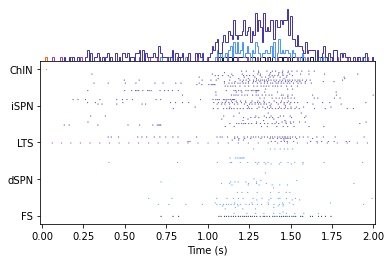

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [7]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 2
#%matplotlib widget
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6743 synapses and 10000 gap junctions
Load done. 0.04562601598445326
!!! Excluding first 0s from the plot
Plotting traces: [2, 5, 6, 7, 8]
Plotted 5 traces (total 99)


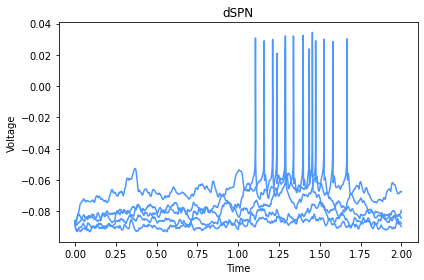

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [3, 4, 11, 16, 18]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

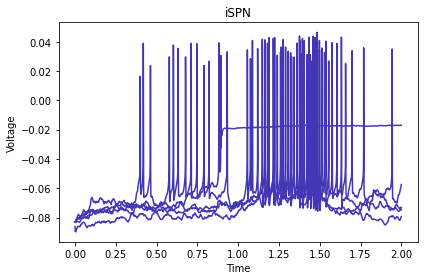

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [1]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

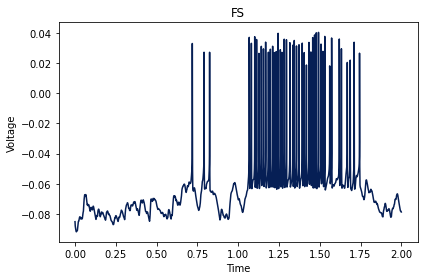

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [0]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

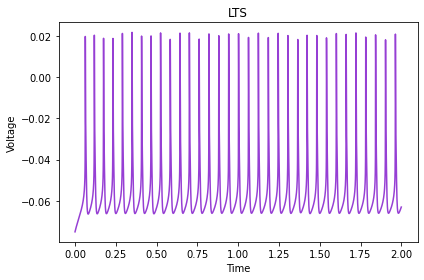

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [83]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

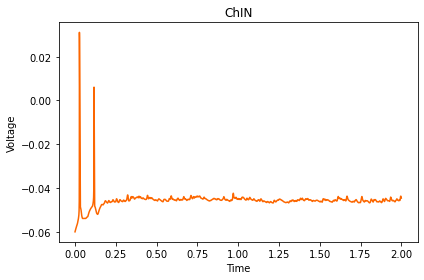

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [8]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
#%matplotlib widget    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Simulation analysis plots are saved as PDF files in the directory `networks/tinySim/figures`.

In [ ]:
!ls networks/tinySim/figures/*.pdf

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).